In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
from branca.element import Figure
from branca.colormap import LinearColormap

In [6]:
# import gzip
# import shutil
# with gzip.open('nrg_bal_c_linear.csv.gz', 'rb') as f_in:
#     with open('nrg_bal_c_linear.csv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [7]:
sns.set_theme()

In [9]:
df = pd.read_csv('JRC-PPDB-OPEN.ver1.0/JRC_OPEN_UNITS.csv')

In [75]:
ot = pd.read_csv('JRC-PPDB-OPEN.ver1.0/JRC_OPEN_TEMPORAL.csv')

In [52]:
ot.shape

(6724, 8)

In [57]:
ot['eic_g'].nunique()

1840

In [54]:
len(ot.groupby(['eic_p', 'eic_g']).groups)

1840

In [66]:
ot.sort_values('cyear').duplicated(subset=['eic_p', 'eic_g']).value_counts()

True     4884
False    1840
Name: count, dtype: int64

In [74]:
ot.sort_index()

,eic_p,eic_g,type_g,cyear,Generation,cf,time_coverage,co2emitted
62,49W000000000070Z,49W000000000001H,Fossil Hard coal,2015,2762000,0.526,0.981,2.477950e+09
174,49W0000000000520,49W000000000053Z,Fossil Hard coal,2015,2116003,0.600,0.986,2.061110e+09
178,17W100P100P0235I,17W100P100P0016U,Fossil Hard coal,2015,279601,0.134,0.956,2.720600e+08
229,49W000000000090T,49W0000000000261,Fossil Gas,2015,181536,0.389,0.238,7.692590e+07
395,14W-WDR-KW-----2,14W-WDR-M1-----I,Fossil Hard coal,2015,666705,0.213,0.942,5.580320e+08
...,...,...,...,...,...,...,...,...
6719,19W0000000001195,19W000000000121I,Fossil Hard coal,2018,814754,0.407,0.995,7.927790e+08
6720,19W0000000001195,19W000000000122G,Fossil Hard coal,2018,698048,0.356,0.995,6.792210e+08
6721,19W0000000001195,19W000000000124C,Fossil Hard coal,2018,841745,0.429,0.995,8.190420e+08
6722,19W0000000001195,19W0000000001268,Fossil Hard coal,2018,675755,0.345,0.995,6.575290e+08


In [51]:
ot.head()

,eic_p,eic_g,type_g,cyear,Generation,cf,time_coverage,co2emitted
0,18WABO1-12345-0X,18WABO1-12345-D7,Fossil Hard coal,2015,1872563,0.626,1.000,1.940210e+09
1,18WABO2-12345-0N,18WABO2-12345-DY,Fossil Hard coal,2015,4056615,0.864,1.000,3.842890e+09
2,48WSTN0000ABTHBN,48W0000000ABTH7Y,Fossil Hard coal,2015,2216884,0.617,0.767,2.625680e+09
3,48WSTN000ABTHGTK,48W000000ABTH7G2,Fossil Oil,2015,12,0.706,0.000,1.309290e+04
4,48WSTN0000ABTHBN,48W0000000ABTH8W,Fossil Hard coal,2015,2308023,0.622,0.791,2.733620e+09


In [47]:
df.isna().nunique()

eic_p                  2
eic_g                  2
name_p                 2
name_g                 2
capacity_p             2
capacity_g             1
type_g                 1
lat                    2
lon                    2
country                1
NUTS2                  2
status_g               2
year_commissioned      2
year_decommissioned    2
water_type             2
cooling_type           2
water_withdrawal       2
water_consumption      2
dtype: int64

In [37]:
df.shape

(7117, 18)

In [38]:
len(df.groupby(['eic_p', 'eic_g']).groups)

7117

In [46]:
df[df['eic_p'].isna()]

,eic_p,eic_g,name_p,name_g,capacity_p,capacity_g,type_g,lat,lon,country,NUTS2,status_g,year_commissioned,year_decommissioned,water_type,cooling_type,water_withdrawal,water_consumption
669,NaN,31WNA74,TE-TO Zagreb,TE-TO Zagreb C,NaN,120.00,Fossil Gas,45.782,16.017,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Air Cooling,0.01,0.01
670,NaN,31WNA75,TE-TO Zagreb K,TE-TO Zagreb K,NaN,208.00,Fossil Gas,45.782,16.017,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Air Cooling,0.01,0.01
671,NaN,31WNA72,KTE Jertovec,KTE Jertovec C,NaN,10.50,Fossil Gas,46.039,16.181,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Natural Draught Tower,0.96,0.78
672,NaN,31WNA73,KTE Jertovec,KTE Jertovec D,NaN,10.50,Fossil Gas,46.039,16.181,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Natural Draught Tower,0.96,0.78
675,NaN,31WNA71,KTE Jertovec,KTE Jertovec B,NaN,27.50,Fossil Gas,46.039,16.181,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Natural Draught Tower,0.96,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,NaN,31WNA90,Sladorana Zupanja,Sladorana Zupanja,NaN,10.00,Fossil Gas,45.088,18.691,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Air Cooling,0.01,0.01
7113,NaN,31WNA91,Termoplin Varazdin,Termoplin Varazdin,NaN,0.03,Fossil Gas,46.314,16.348,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Air Cooling,0.01,0.01
7114,NaN,31WNA92,Energo Rijeka,Energo Rijeka,NaN,0.50,Fossil Gas,45.329,14.439,Croatia,HR03,COMMISSIONED,NaN,NaN,Seawater,Once-through,132.48,0.91
7115,NaN,31WNA93,Osatina Tomasinci,Osatina Tomasinci,NaN,1.80,Fossil Gas,45.396,18.421,Croatia,HR04,COMMISSIONED,NaN,NaN,Freshwater,Air Cooling,0.01,0.01


In [12]:
ot.shape

(6724, 8)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df['type_g'].value_counts()

type_g
Hydro Water Reservoir              1853
Hydro Run-of-river and poundage    1590
Fossil Gas                         1075
Wind Onshore                        737
Fossil Hard coal                    362
Solar                               278
Hydro Pumped Storage                235
Fossil Brown coal/Lignite           214
Biomass                             168
Nuclear                             161
Fossil Oil                          134
Fossil Coal-derived gas              73
Wind Offshore                        71
Other                                68
Waste                                37
Geothermal                           35
Fossil Oil shale                     13
Fossil Peat                          10
Fossil Hard Coal                      1
Marine                                1
Fossil gas                            1
Name: count, dtype: int64

In [15]:
gpp = df[df['country'] == 'Germany']

In [16]:
gpp.groupby('type_g')['water_consumption'].sum().sort_values(ascending=False).index

Index(['Fossil Hard coal', 'Fossil Brown coal/Lignite', 'Fossil Gas',
       'Fossil Coal-derived gas', 'Nuclear', 'Fossil Oil', 'Waste',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Wind Offshore', 'Wind Onshore'],
      dtype='object', name='type_g')

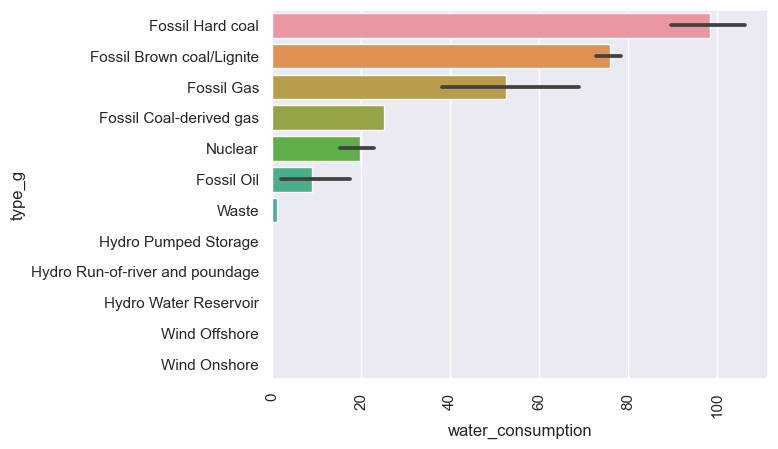

In [17]:
sns.barplot(
    data=gpp,
    y="type_g",
    x="water_consumption",
    estimator="sum",
    order=gpp.groupby("type_g")["water_consumption"]
    .sum()
    .sort_values(ascending=False)
    .index,
)
plt.xticks(rotation=90)
plt.show()

In [32]:
gpp[['name_g']].nunique()

name_g    283
dtype: int64

In [18]:
gpp

,eic_p,eic_g,name_p,name_g,capacity_p,capacity_g,type_g,lat,lon,country,NUTS2,status_g,year_commissioned,year_decommissioned,water_type,cooling_type,water_withdrawal,water_consumption
251,11WD8DRES5X---PZ,11WD8DRES5X----D,GTHKW Nossener Bruecke,GTHKW Nossener Bruecke,260.0,260.0,Fossil Gas,51.042,13.708,Germany,DED2,COMMISSIONED,1995.0,NaN,Freshwater,Natural Draught Tower,0.96,0.78
252,11WD8HAVLXW---PM,11WD8HAVLXW----0,Windpark Havelland,Windpark Havelland,147.0,147.0,Wind Onshore,52.387,12.564,Germany,DE40,COMMISSIONED,2009.0,NaN,Freshwater,NaN,0.00,0.00
253,11WD8MOOR1C----G,11WD8MOOR1C---AV,HKW Moorburg,HKW Moorburg Block A,1600.0,800.0,Fossil Hard coal,53.490,9.949,Germany,DE60,COMMISSIONED,2014.0,NaN,Freshwater,Mechanical Draught Tower,2.40,1.87
254,11WD8MOOR1C----G,11WD8MOOR1C---BT,HKW Moorburg,HKW Moorburg Block B,1600.0,800.0,Fossil Hard coal,53.490,9.949,Germany,DE60,COMMISSIONED,2014.0,NaN,Freshwater,Mechanical Draught Tower,2.40,1.87
255,11WD8TIEF5X----V,11WD8TIEF5G-GUDI,HKW Tiefstack,HKW Tiefstack GuD,316.0,127.0,Fossil Gas,53.525,10.071,Germany,DE60,COMMISSIONED,1993.0,NaN,Freshwater,Once-through,43.07,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,11WD4DAXLA-S---T,11WD4RDK71C7---G,Rheinhafen-Dampfkraftwerk Karlsruhe,RDK 7,1347.0,505.0,Fossil Hard coal,49.015,8.304,Germany,DE12,COMMISSIONED,1985.0,NaN,Freshwater,Once-through,137.59,0.95
547,11WD4DAXLA-S---T,11WD4RDK81C8---3,Rheinhafen-Dampfkraftwerk Karlsruhe,RDK 8,1347.0,842.0,Fossil Hard coal,49.015,8.304,Germany,DE12,COMMISSIONED,2014.0,NaN,Freshwater,Natural Draught Tower,2.40,1.87
548,11WD4GKM-XCD0--3,11W0-0000-0004-B,GKM AG DBEnergie,GKM AG DBEnergie,244.0,244.0,Fossil Hard coal,49.445,8.500,Germany,DE12,COMMISSIONED,NaN,NaN,Freshwater,Once-through,137.59,0.95
549,11WD4DAXLA-2S--6,11WD4RDK42G4---O,Rheinhafen-Dampfkraftwerk Karlsruhe,RDK 4,353.0,353.0,Fossil Gas,49.015,8.304,Germany,DE12,RESERVE,1998.0,NaN,Freshwater,Once-through,43.07,0.38


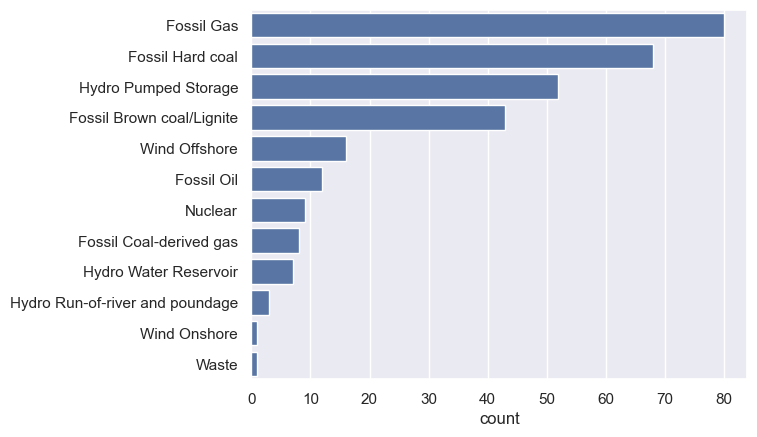

In [19]:
sns.countplot(data=gpp, y='type_g', order=gpp['type_g'].value_counts().index, color='b')
plt.ylabel('')
plt.show()

In [20]:
kraftwerks = gpp[['name_p', 'lat', 'lon']].drop_duplicates('name_p').dropna()

In [21]:
fig = Figure(width=800, height=600)
m = folium.Map([50, 10], tiles="cartodbdark_matter", zoom_start=5)
for row in kraftwerks.iterrows():
    # print(row[1][2])
    coordinates = (row[1][1], row[1][2])
    label = folium.Marker(
        location=coordinates,  # Use the coordinates from the GeoJSON
    )
    label.add_to(m)
fig.add_child(m)

In [22]:
df[df['country'] == 'Germany'].head(5)

,eic_p,eic_g,name_p,name_g,capacity_p,capacity_g,type_g,lat,lon,country,NUTS2,status_g,year_commissioned,year_decommissioned,water_type,cooling_type,water_withdrawal,water_consumption
251,11WD8DRES5X---PZ,11WD8DRES5X----D,GTHKW Nossener Bruecke,GTHKW Nossener Bruecke,260.0,260.0,Fossil Gas,51.042,13.708,Germany,DED2,COMMISSIONED,1995.0,NaN,Freshwater,Natural Draught Tower,0.96,0.78
252,11WD8HAVLXW---PM,11WD8HAVLXW----0,Windpark Havelland,Windpark Havelland,147.0,147.0,Wind Onshore,52.387,12.564,Germany,DE40,COMMISSIONED,2009.0,NaN,Freshwater,NaN,0.00,0.00
253,11WD8MOOR1C----G,11WD8MOOR1C---AV,HKW Moorburg,HKW Moorburg Block A,1600.0,800.0,Fossil Hard coal,53.490,9.949,Germany,DE60,COMMISSIONED,2014.0,NaN,Freshwater,Mechanical Draught Tower,2.40,1.87
254,11WD8MOOR1C----G,11WD8MOOR1C---BT,HKW Moorburg,HKW Moorburg Block B,1600.0,800.0,Fossil Hard coal,53.490,9.949,Germany,DE60,COMMISSIONED,2014.0,NaN,Freshwater,Mechanical Draught Tower,2.40,1.87
255,11WD8TIEF5X----V,11WD8TIEF5G-GUDI,HKW Tiefstack,HKW Tiefstack GuD,316.0,127.0,Fossil Gas,53.525,10.071,Germany,DE60,COMMISSIONED,1993.0,NaN,Freshwater,Once-through,43.07,0.38


In [23]:
df.shape

(7117, 18)

In [24]:
df.isna().count()

eic_p                  7117
eic_g                  7117
name_p                 7117
name_g                 7117
capacity_p             7117
capacity_g             7117
type_g                 7117
lat                    7117
lon                    7117
country                7117
NUTS2                  7117
status_g               7117
year_commissioned      7117
year_decommissioned    7117
water_type             7117
cooling_type           7117
water_withdrawal       7117
water_consumption      7117
dtype: int64

In [25]:
df.describe()

,capacity_p,capacity_g,lat,lon,year_commissioned,year_decommissioned,water_withdrawal,water_consumption
count,5439.000000,7117.000000,4951.000000,4951.000000,1777.000000,164.000000,3439.000000,3439.000000
mean,338.120997,109.496672,53.291922,9.135417,1981.483962,2015.231707,20.575920,0.522291
std,600.875954,208.816689,8.568370,8.080982,20.945121,1.791588,46.309604,0.788002
min,0.000000,0.000000,36.184000,-9.423000,1899.000000,2007.000000,0.000000,0.000000
25%,20.000000,3.300000,45.537500,5.958000,1971.000000,2015.000000,0.000000,0.000000
50%,106.700000,22.000000,53.202000,9.071000,1981.000000,2015.000000,0.060000,0.060000
75%,382.000000,125.000000,60.403000,13.932000,1997.000000,2016.000000,2.220000,0.910000
max,5472.000000,4687.400000,71.569000,30.222000,2020.000000,2020.000000,167.870000,3.430000
